<a href="https://colab.research.google.com/github/HasanMdKamrul/DataScienceProject/blob/main/Support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [3]:
print(X) # 2-D array

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print(y) # 1-D array

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [5]:
y = y.reshape(len(y),1) # Since later on our StandardScaler class will expect a 2-D as its input we transform it here using reshape function. Where our 1st argument takes the row number and the second one is the Column

In [6]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [ ]:
# When to apply feature scaling?
# If we look closely in our dataset we'll see that our dependent variable heavyly impact our features X
# Due to this reason our SVR model might not consider the features X during the training. (Dependent variable is very dominating here)
# We will not apply feature scalling into dummy variables bcz they are alreay OneHotEncoded and in the right shape
# We will not apply feature scaling in our dependent variable when its level encoded(Zeros and ones)
# For the training and stest set case we'll apply the feature scalling after the split

In [ ]:
# Where feature scalling needed--> When in the solving or predicting equation we will not have any co-efficients to compensate the features there we need to feature scalling.

In [7]:
from sklearn.preprocessing import StandardScaler # StandardScaler class will scale the values from -3 to +3 range
sc_X = StandardScaler() # Instance for the matrix of features X 
sc_y = StandardScaler() # Instance for the Dependent variable y. Two instances bcz--> they have different standard deviation and mean.
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [ ]:
# Why we use feature scalling here without spliting the dataset into training set and test set.
# Becoz here we are using whole dataset as the training set no test set here so there will be no effect on the test set.

In [8]:
print(X) # Values hoverd arround -3 to +3 ( As feature scalling promised)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [11]:
print(y) # Values hoverd arround -3 to +3 ( As feature scalling promised)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [11]:
from sklearn.svm import SVR # from svm module we've imported the SVR class
regressor = SVR(kernel = 'rbf') # We created an instance of that SVR class and it takes a parameter which is widely used the gaussian radial basis function. For more insights visit--> https://data-flair.training/blogs/svm-kernel-functions/#:~:text=SVM%20Kernel%20Functions,it%20into%20the%20required%20form.&text=For%20example%20linear%2C%20nonlinear%2C%20polynomial,(RBF)%2C%20and%20sigmoid.
regressor.fit(X, y) # This fit function will train the model. Since we have not implemented the split of the training and test sets we only have the training data so we will use it only

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting a new result

In [14]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]]))) 

array([170370.0204065])

In [ ]:
# First step---> Normally for prediction we use regressor.predict([[6.5]])
# In this case the we've changed the matrix of feature of X during our feature scalling part where our Independent variables X and y dependent variable has different scale 
# So this 6.5 has to be scaled like the scaling we did earlier here like (regressor.predict(sc_X.tranform([[6.5]]))) ---> This will produce the result according to the new scale
# In the last part we will inverse_transform our result to get the original value (Expected salary by the new person for the position level 6.5) ---> sc_y.inverse_tranform(previously got result)

## Visualising the SVR results

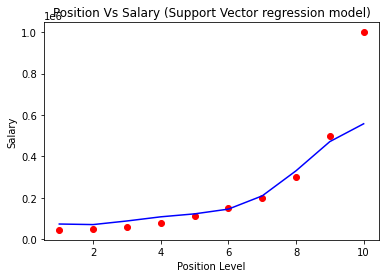

In [15]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y) , color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color= 'blue') 
plt.title('Position Vs Salary (Support Vector regression model)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

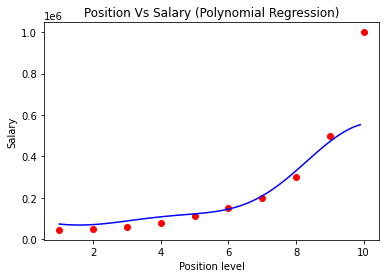

In [16]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
plt.title('Position Vs Salary (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()